In [ ]:
pip install pycricbuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycricbuzz import Cricbuzz

#####IPL Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


####Read Data

In [ ]:
data= pd.read_csv("/content/matches.csv")

In [ ]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [ ]:
data.shape

(636, 18)

In [ ]:
data.info

<bound method DataFrame.info of       id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers B

###Total Column

In [ ]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

####Checking Null Values

In [ ]:
data.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [ ]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


####Total Match id

In [ ]:
data['id'].count()

636

###Unique Season

In [ ]:
data['season'].unique

<bound method Series.unique of 0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
631    2016
632    2016
633    2016
634    2016
635    2016
Name: season, Length: 636, dtype: int64>

####Max Run

In [ ]:
data['win_by_runs'].max()

146

####Team Details for max run

In [ ]:
data['win_by_runs'].idxmax()

43

In [ ]:
data.iloc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

#####Team Details for win by wickets

In [ ]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [ ]:
data.groupby(['season','city']).groups

{(2008, 'Bangalore'): [59, 69, 73, 83, 89, 103, 110], (2008, 'Chandigarh'): [60, 68, 72, 80, 93, 96, 107], (2008, 'Chennai'): [66, 70, 78, 84, 90, 106, 109], (2008, 'Delhi'): [61, 75, 86, 97, 99, 108], (2008, 'Hyderabad'): [65, 67, 76, 79, 91, 101, 113], (2008, 'Jaipur'): [64, 77, 82, 88, 92, 100, 112], (2008, 'Kolkata'): [63, 74, 87, 94, 102, 104, 111], (2008, 'Mumbai'): [62, 71, 81, 85, 95, 98, 105, 114, 115, 116], (2009, 'Bloemfontein'): [160, 164], (2009, 'Cape Town'): [117, 118, 119, 120, 123, 125, 129], (2009, 'Centurion'): [132, 135, 136, 146, 147, 148, 155, 156, 165, 169, 170, 171], (2009, 'Durban'): [122, 124, 126, 127, 130, 133, 134, 138, 144, 145, 157, 158, 159, 167, 168], (2009, 'East London'): [137, 143, 149], (2009, 'Johannesburg'): [140, 142, 153, 162, 163, 166, 172, 173], (2009, 'Kimberley'): [150, 151, 154], (2009, 'Port Elizabeth'): [121, 128, 131, 139, 141, 152, 161], (2010, 'Ahmedabad'): [179, 186, 194, 197], (2010, 'Bangalore'): [180, 183, 191, 196, 213, 216, 225],

####Highest match in which season

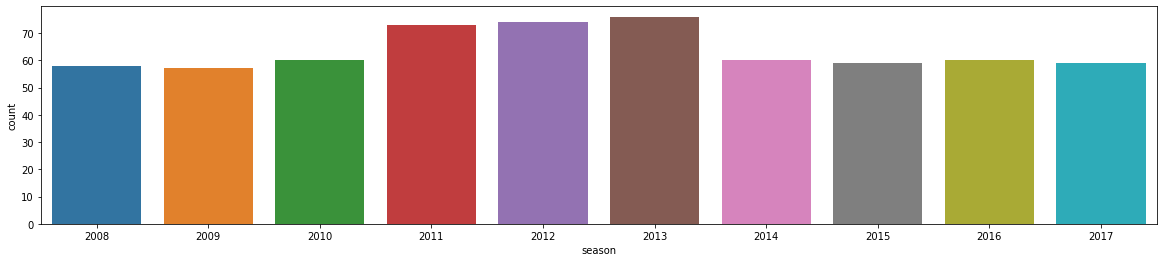

In [ ]:
fig_dims = (20,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="season",ax=ax,data=data)
plt.show()

######City wise visualization

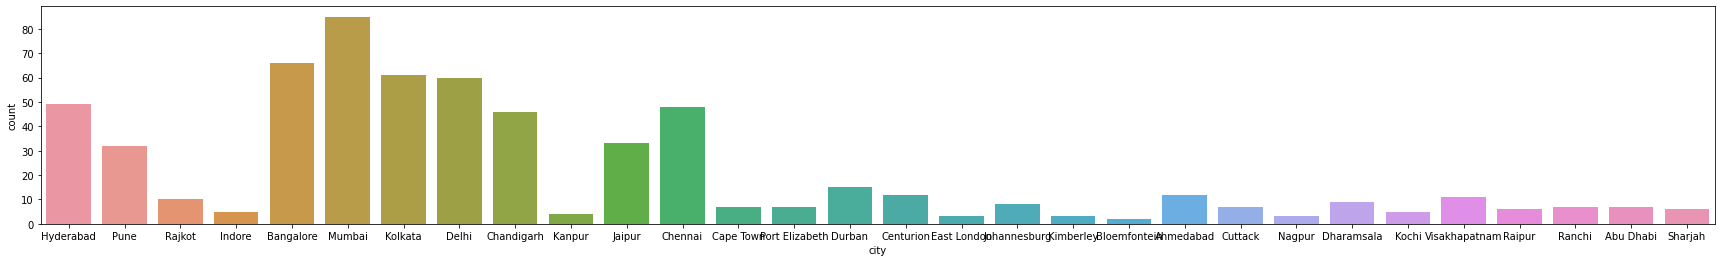

In [ ]:
fig_dims = (30,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='city',ax=ax,data=data)
plt.show()

#####The most succesful IPL team

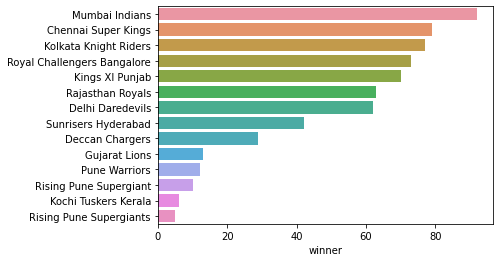

In [ ]:
data1 = data.winner.value_counts()
sns.barplot(y=data1.index,x=data1)

#####Lowest win by wicket team detail

In [ ]:
data['win_by_wickets'].idxmin()

0